In [ ]:
# downloading txt files from google drive here

In [ ]:
! gdown --id  1gbUf_MpE8-xVvyG0_2kM3jB8ujrb64Do
! gdown --id  1ZxjKweFyG5moMZWZSfQbeKdfcDSeJTH9
! gdown --id  1vwdtVBi5Okd6SiIlBJeEjI2n4inbglA8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gbUf_MpE8-xVvyG0_2kM3jB8ujrb64Do
To: /content/Strategic Relations between countries.txt
100% 458/458 [00:00<00:00, 1.60MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZxjKweFyG5moMZWZSfQbeKdfcDSeJTH9
To: /content/Annual Defence Spending of countries.txt
100% 158/158 [00:00<00:00, 470kB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn

In [ ]:
pip install networkx   # need to plot graph


In [ ]:
# Reading all the txt files

In [ ]:
# Specify the file path
import pandas as pd


file_path = '/content/Annual Defence Spending of countries.txt'

# Open and read the content of the text file
with open(file_path, 'r') as file:
    content = file.read()

# Split the content based on the 'bn $' separator
entries = content.split('bn $')

# Remove any leading or trailing whitespace from each entry
entries = [entry.strip() for entry in entries if entry.strip()]

# Create a list of tuples where each tuple contains the country and spending
data = [(entry.split()[0], int(entry.split()[1])) for entry in entries]

df_Annual_Defence = pd.DataFrame(data, columns=['Country', 'Spending'])

# Display the DataFrame
print(df_Annual_Defence)

    Country  Spending
0        US       801
1     China       293
2     India        76
3        UK        68
4    Russia        65
5   Germany        56
6     Japan        54
7  Pakistan        12
8   Hungary         8


In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/Political Atomosphere within countries.txt'

# Open and read the content of the text file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Split the content into country and attribute
data = [line.strip().split('->') for line in lines]

# Create a DataFrame
df_Political_Atmosphere = pd.DataFrame(data, columns=['Country', 'Political'])

# Display the DataFrame
print(df_Political_Atmosphere)


     Country          Political
0        US    Strong democracy
1     China    Strong communism
2     India    Strong democracy
3        UK    Strong democracy
4    Russia      Weak democracy
5   Germany    Strong democracy
6     Japan    Strong democracy
7  Pakistan      Weak democracy
8   Hungary      Weak communism


In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/Strategic Relations between countries.txt'

# Open and read the content of the text file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract data from nested lists
data = [line.strip().replace('[', '').replace(']', '').split(', ') for line in lines]

# Create a DataFrame
df_Strategic_Relations = pd.DataFrame(data, columns=['Country1', 'Country2', 'Relation'])

# Display the DataFrame
print(df_Strategic_Relations)


    Country1  Country2          Relation
0    Hungary    Russia       Weak Allies
1         US        UK     Strong Allies
2      India  Pakistan  Strong Adversary
3      China     Japan  Strong Adversary
4         US     Japan     Strong Allies
5      India     China    Weak Adversary
6      China        US    Weak Adversary
7      China        UK    Weak Adversary
8      China    Russia     Strong Allies
9      India     Japan       Weak Allies
10   Germany        US     Strong Allies
11   Hungary   Germany       Weak Allies
12     India        US       Weak Allies
13  Pakistan        US       Weak Allies
14    Russia   Germany    Weak Adversary


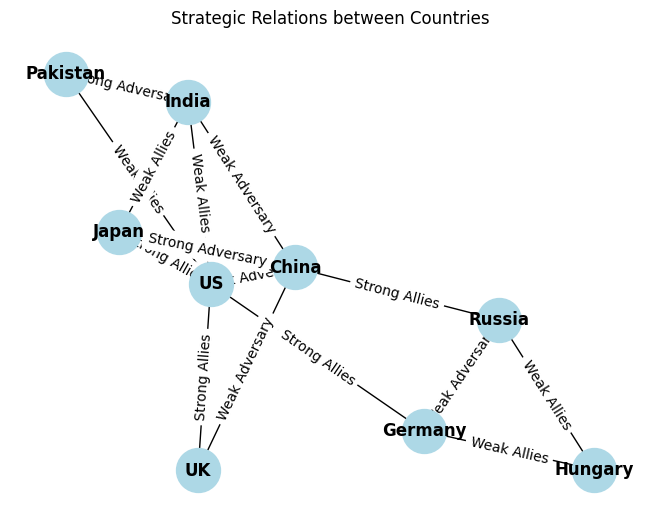

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(df_Strategic_Relations, 'Country1', 'Country2', ['Relation'])

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'Relation')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Strategic Relations between Countries')
plt.show()

# Not suitable to see connections

In [ ]:
# Show in blob digram and scatter , as you said in the lecture

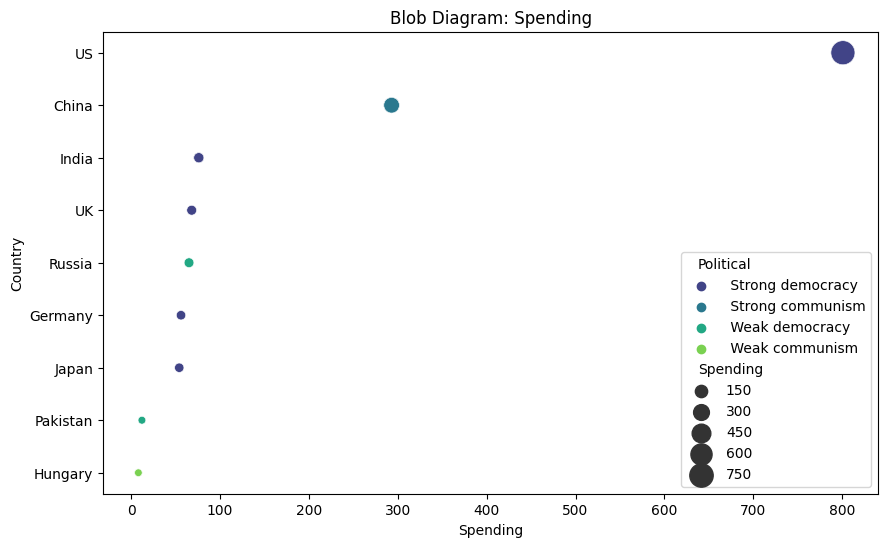

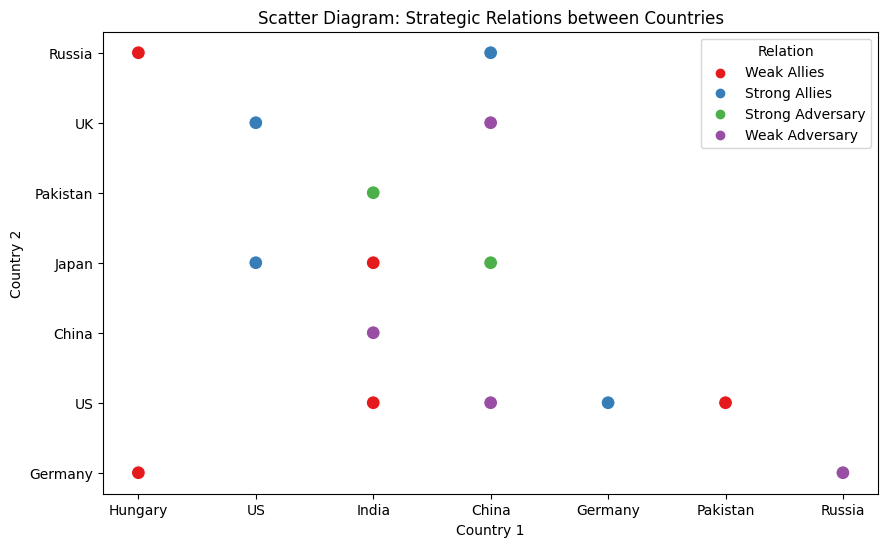

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge DataFrames
df_Annual_Defence['Country'] = df_Annual_Defence['Country'].str.strip()
df_Political_Atmosphere['Country'] = df_Political_Atmosphere['Country'].str.strip()
df_Strategic_Relations['Country1'] =  df_Strategic_Relations['Country1'].str.strip()

# need to merge data
df_merge = pd.merge(df_Annual_Defence, df_Political_Atmosphere, on='Country')
df_merge = pd.merge(df_merge, df_Strategic_Relations, left_on='Country', right_on='Country1', how='left')

# Blob Diagram with constant color and variable size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending', y='Country', hue='Political', size='Spending', data=df_merge, palette='viridis', sizes=(30, 300))
plt.title('Blob Diagram: Spending')
plt.xlabel('Spending')
plt.ylabel('Country')
plt.show()

# Scatter Diagram
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country1', y='Country2', hue='Relation', data=df_Strategic_Relations, palette='Set1', s=100)
plt.title('Scatter Diagram: Strategic Relations between Countries')
plt.xlabel('Country 1')
plt.ylabel('Country 2')
plt.show()
#df_merge